CHRIS ALISTER

2347218

ETE-3 LAB EXAM



# **Question 2 - CNN Autoencoder for Image Reconstruction**

## Loading the Dataset

In [5]:
import zipfile
import os

# Define the path to the uploaded zip file and the extraction folder
zip_file_path = '/content/archive (3).zip'
extraction_path = '/mnt/data/coil_dataset/'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# List the extracted files to confirm the dataset structure
os.listdir(extraction_path)


['coil-20']

In [6]:
# List the contents of the 'coil-20' directory to check the dataset structure
coil20_path = os.path.join(extraction_path, 'coil-20')
os.listdir(coil20_path)[:10]  # Display the first 10 files for brevity


['coil-20-proc', 'coil-20-unproc']

In [7]:
# List contents of the 'coil-20-proc' directory to inspect image files
proc_path = os.path.join(coil20_path, 'coil-20-proc')
os.listdir(proc_path)[:10]  # Display the first 10 files for brevity


['obj20__33.png',
 'obj16__15.png',
 'obj7__61.png',
 'obj7__8.png',
 'obj16__43.png',
 'obj1__44.png',
 'obj8__62.png',
 'obj1__40.png',
 'obj14__26.png',
 'obj20__10.png']

##  1. Dataset: Load and preprocess images

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Constants
IMG_SIZE = (64, 64)  # Resize images to 64x64
IMAGE_DIR = proc_path

# 1. Dataset: Load and preprocess images
def load_images(image_dir, img_size):
    """
    Load and preprocess images from the dataset.
    Resizes and normalizes the images to [0, 1].
    """
    images = []
    for file_name in sorted(os.listdir(image_dir)):
        if file_name.endswith(".png"):
            img_path = os.path.join(image_dir, file_name)
            img = load_img(img_path, target_size=img_size, color_mode="grayscale")
            img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
    return np.array(images)

# Load the dataset
images = load_images(IMAGE_DIR, IMG_SIZE)
print(f"Dataset shape: {images.shape}")

Dataset shape: (1440, 64, 64, 1)


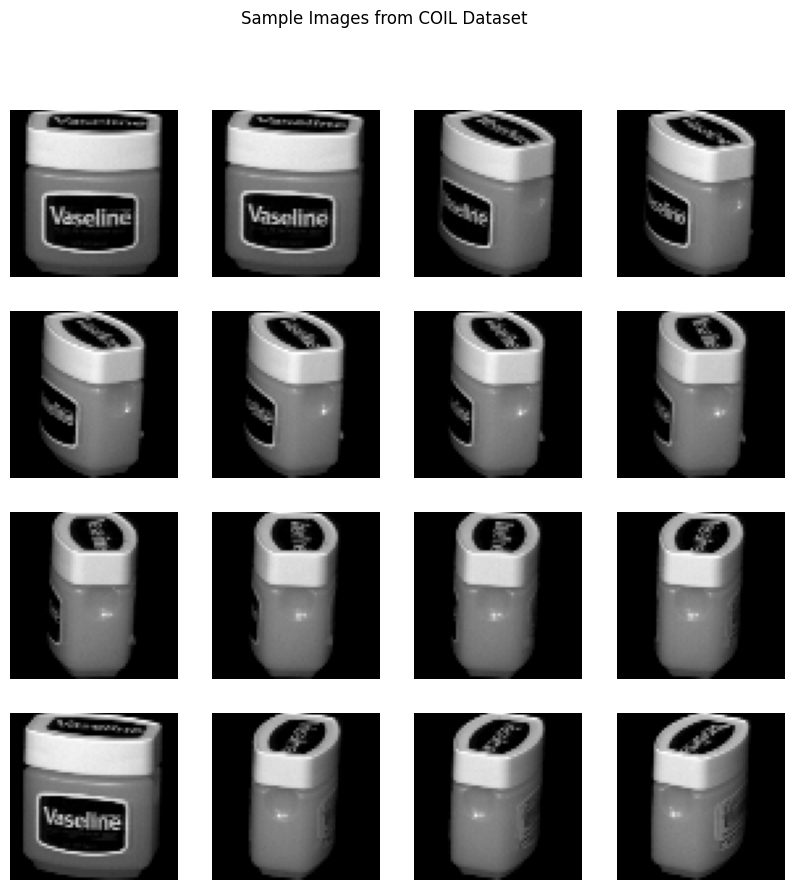

In [9]:
# Visualize sample images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].reshape(64, 64), cmap='gray')
    plt.axis('off')
plt.suptitle('Sample Images from COIL Dataset')
plt.show()

## Split the dataset into training and testing sets


In [10]:
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
print(f"Training set shape: {train_images.shape}, Testing set shape: {test_images.shape}")

Training set shape: (1152, 64, 64, 1), Testing set shape: (288, 64, 64, 1)


## 2. Model Development: Define the CNN Autoencoder


In [11]:
# 2. Model Development: Define the CNN Autoencoder
def create_autoencoder(input_shape):
    """
    Creates a CNN Autoencoder with an encoder and a decoder.
    Encoder compresses the image into a latent space.
    Decoder reconstructs the image from the latent space.
    """
    # Encoder
    input_img = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', strides=(2, 2), padding='same')(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', strides=(2, 2), padding='same')(x)
    decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', strides=(2, 2), padding='same')(x)

    # Model
    autoencoder = models.Model(input_img, decoded)
    return autoencoder

# Create and summarize the autoencoder
input_shape = (64, 64, 1)
autoencoder = create_autoencoder(input_shape)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 64, 64, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 332,801 (1.27 MB)

 Trainable params: 332,801 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Training: Compile and train the autoencoder


In [13]:
# 3. Training: Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(
    train_images, train_images,  # Input and output are the same
    epochs=20,
    batch_size=32,
    validation_data=(test_images, test_images)
)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 429ms/step - loss: 0.0281 - val_loss: 0.0103
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 417ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 417ms/step - loss: 0.0076 - val_loss: 0.0078
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 416ms/step - loss: 0.0073 - val_loss: 0.0075
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 415ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 415ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 414ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 417ms/step - loss: 0.0063 - val_loss: 0.0066
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 20s 417ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 25s 540ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 11/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 18s 509ms/step - loss: 0.0058 - val_loss: 0.0060
Epoch 12/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 17

## 4. Evaluation


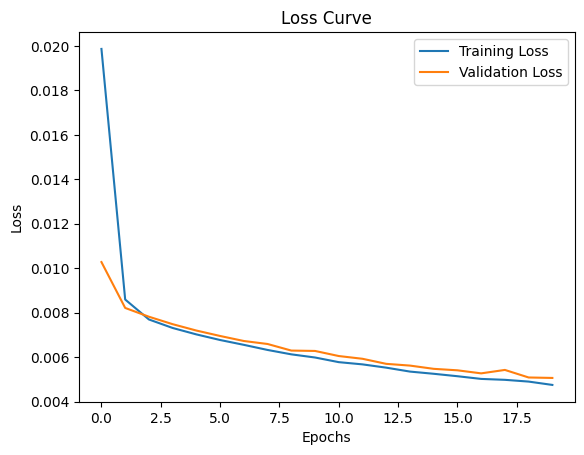

In [14]:
# 4. Evaluation
# Plot loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()



The training loss decreases steadily throughout the 20 epochs, indicating that the model is learning to reconstruct images from the dataset effectively.
The validation loss closely follows the training loss, showing no signs of overfitting. This suggests that the model generalizes well to unseen data.

In [15]:
# Calculate and report the test set MSE
test_mse = autoencoder.evaluate(test_images, test_images)
print(f"Test MSE: {test_mse}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0052
Test MSE: 0.005063192453235388


The test Mean Squared Error (MSE) value of 0.00506 is very low, indicating that the model has performed well on the unseen test data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


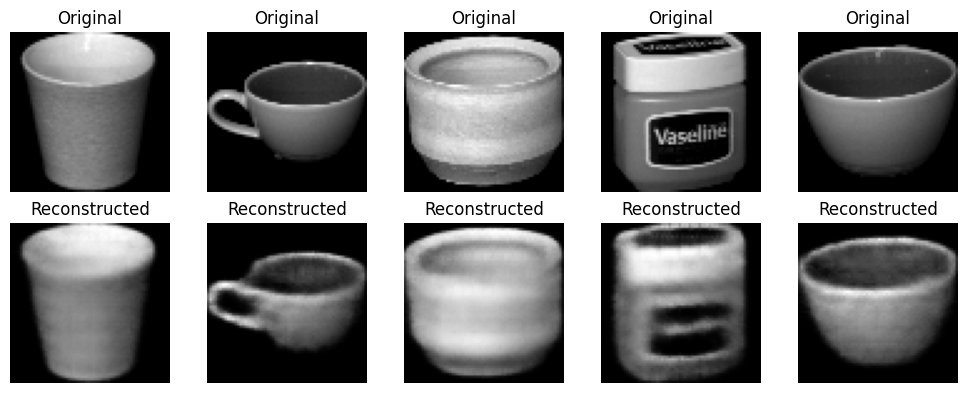

In [16]:
# Visualize original and reconstructed images
n = 5  # Number of examples to display
decoded_images = autoencoder.predict(test_images[:n])

plt.figure(figsize=(10, 4))
for i in range(n):
    # Original image
    plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(64, 64), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed image
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(64, 64), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()

The reconstructed images resemble the original images but with slight blurring and loss of fine details.
The overall structure and shape of the objects in the images are well-preserved, which is typical for an autoencoder that focuses on reconstructing the primary features of input data.

#Interpretation/Insights

1. Loss Curve
- A smooth convergence in both training and validation loss curves indicates the effectiveness of the autoencoder's architecture and hyperparameter choices .
The final loss values are relatively low, which is expected for Mean Squared Error (MSE) when pixel values are normalized between 0 and 1.


2. Reconstructed images

- The blurring in reconstructed images may result from:
  Compression in the latent space, as the encoder reduces the dimensionality of input images.
  A relatively small autoencoder capacity, which trades off detail for efficiency.
  Despite this, the reconstructions retain the primary object contours, demonstrating the autoencoder's ability to encode and decode essential information effectively.


3. Test MSE
-   Low MSE: A low MSE indicates that the model's reconstructions are close to the original images, with minimal error per pixel. This suggests the autoencoder is effectively capturing the essential features and structure of the images.
- Generalization: The close match between the training and test losses, combined with a low test MSE, suggests that the model generalizes well, meaning it's not overfitting to the training data.